In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
cars_data=pd.read_csv("New_cars24_project_final.csv")
cars_data

,Brand Name,Model_Name,Model_Year,Emi Per Month,Down Payment,KMs Travelled,Owners,Fule Type,RTO Number,Location,Engine Displacement,Transmission Type,Original Price,Actual Price
0,Toyota,Etios Liva,2011,"5,181",Zero,"35,131",2,Petrol,DL-10,Noida,NaN,Manual,"2,87,000","2,65,000"
1,Hyundai,Tucson New,2018,"26,667",Zero,"42,864",1,Petrol,HR-26,Noida,2.0,Manual,"17,55,000","14,01,000"
2,Skoda,Rapid,2016,"9,228",Zero,"66,054",1,Petrol,DL-7C,Noida,1.6,Manual,"4,72,000","4,72,000"
3,Hyundai,Verna,2014,"7,937",Zero,"94,348",3,Petrol,HR-26,Delhi,NaN,Manual,"4,21,000","4,06,000"
4,Tata,TIGOR,2018,"10,127",Zero,"57,116",1,Petrol,UP-16,Ghaziabad,NaN,Manual,"5,32,000","5,18,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,Maruti,Zen Estilo,2010,"3,675",Zero,"54,715",1,Petrol,GJ-06,Vadodara,NaN,Manual,"1,88,000","1,88,000"
501,Maruti,Baleno,2017,"11,437",Zero,"61,465",1,Petrol,GJ-06,Vadodara,NaN,Manual,"5,85,000","5,85,000"
502,Hyundai,Elite i20,2016,"11,007",Zero,"71,293",2,Petrol,GJ-01,Vadodara,NaN,Manual,"5,76,000","5,63,000"
503,Maruti,Alto 800,2014,"4,692",Zero,"46,430",2,Petrol,GJ-06,Hyderabad,NaN,Manual,"2,40,000","2,40,000"


In [3]:
cars_data.head()   ## return top 5 data from data frame

,Brand Name,Model_Name,Model_Year,Emi Per Month,Down Payment,KMs Travelled,Owners,Fule Type,RTO Number,Location,Engine Displacement,Transmission Type,Original Price,Actual Price
0,Toyota,Etios Liva,2011,"5,181",Zero,"35,131",2,Petrol,DL-10,Noida,NaN,Manual,"2,87,000","2,65,000"
1,Hyundai,Tucson New,2018,"26,667",Zero,"42,864",1,Petrol,HR-26,Noida,2.0,Manual,"17,55,000","14,01,000"
2,Skoda,Rapid,2016,"9,228",Zero,"66,054",1,Petrol,DL-7C,Noida,1.6,Manual,"4,72,000","4,72,000"
3,Hyundai,Verna,2014,"7,937",Zero,"94,348",3,Petrol,HR-26,Delhi,NaN,Manual,"4,21,000","4,06,000"
4,Tata,TIGOR,2018,"10,127",Zero,"57,116",1,Petrol,UP-16,Ghaziabad,NaN,Manual,"5,32,000","5,18,000"


In [4]:
cars_data.shape

(505, 14)

- returns the shape of the data frame In cars_data there  are 505 rows and 14 columns in my data frame

In [5]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand Name           505 non-null    object 
 1   Model_Name           505 non-null    object 
 2   Model_Year           505 non-null    int64  
 3   Emi Per Month        505 non-null    object 
 4   Down Payment         505 non-null    object 
 5   KMs Travelled        505 non-null    object 
 6   Owners               505 non-null    int64  
 7   Fule Type            505 non-null    object 
 8   RTO Number           505 non-null    object 
 9   Location             505 non-null    object 
 10  Engine Displacement  94 non-null     float64
 11  Transmission Type    505 non-null    object 
 12  Original Price       505 non-null    object 
 13  Actual Price         505 non-null    object 
dtypes: float64(1), int64(2), object(11)
memory usage: 55.4+ KB


- from the info() we can evaluate  the data type  of each column and null values .
- so from the above the columns `Emi Per Month,KMs Travelled,Original Price,Actual Price` should be in `integer` datatype.

In [6]:
cars_data.isnull().sum() ## shows how many null values are present in each column 

Brand Name               0
Model_Name               0
Model_Year               0
Emi Per Month            0
Down Payment             0
KMs Travelled            0
Owners                   0
Fule Type                0
RTO Number               0
Location                 0
Engine Displacement    411
Transmission Type        0
Original Price           0
Actual Price             0
dtype: int64

In [7]:
cars_data.isnull().sum()*100/len(cars_data)

Brand Name              0.000000
Model_Name              0.000000
Model_Year              0.000000
Emi Per Month           0.000000
Down Payment            0.000000
KMs Travelled           0.000000
Owners                  0.000000
Fule Type               0.000000
RTO Number              0.000000
Location                0.000000
Engine Displacement    81.386139
Transmission Type       0.000000
Original Price          0.000000
Actual Price            0.000000
dtype: float64

-    shows the percentage of null values are present .
-    if there are more than 5% of null vales in data we can drop that column from data frame
-    so in `Engine Displacement` we are having `81%` of null values so we can drop the column.

In [8]:
cars_data.drop("Engine Displacement",axis=1,inplace=True)  

-  here it drops the `Engine Displacement`  column from data frame

In [9]:
cars_data

,Brand Name,Model_Name,Model_Year,Emi Per Month,Down Payment,KMs Travelled,Owners,Fule Type,RTO Number,Location,Transmission Type,Original Price,Actual Price
0,Toyota,Etios Liva,2011,"5,181",Zero,"35,131",2,Petrol,DL-10,Noida,Manual,"2,87,000","2,65,000"
1,Hyundai,Tucson New,2018,"26,667",Zero,"42,864",1,Petrol,HR-26,Noida,Manual,"17,55,000","14,01,000"
2,Skoda,Rapid,2016,"9,228",Zero,"66,054",1,Petrol,DL-7C,Noida,Manual,"4,72,000","4,72,000"
3,Hyundai,Verna,2014,"7,937",Zero,"94,348",3,Petrol,HR-26,Delhi,Manual,"4,21,000","4,06,000"
4,Tata,TIGOR,2018,"10,127",Zero,"57,116",1,Petrol,UP-16,Ghaziabad,Manual,"5,32,000","5,18,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,Maruti,Zen Estilo,2010,"3,675",Zero,"54,715",1,Petrol,GJ-06,Vadodara,Manual,"1,88,000","1,88,000"
501,Maruti,Baleno,2017,"11,437",Zero,"61,465",1,Petrol,GJ-06,Vadodara,Manual,"5,85,000","5,85,000"
502,Hyundai,Elite i20,2016,"11,007",Zero,"71,293",2,Petrol,GJ-01,Vadodara,Manual,"5,76,000","5,63,000"
503,Maruti,Alto 800,2014,"4,692",Zero,"46,430",2,Petrol,GJ-06,Hyderabad,Manual,"2,40,000","2,40,000"


#### Now lets change the data type in data frame

In [10]:
cars_data["Original Price"] =   cars_data["Original Price"].str.replace(",","")
cars_data['Original Price'] =   cars_data['Original Price'].astype(int)

cars_data["Actual Price"]   =   cars_data["Actual Price"].str.replace(",","")
cars_data['Actual Price']   =   cars_data['Actual Price'].astype(int)

cars_data["Emi Per Month"]  =   cars_data["Emi Per Month"].str.replace(",","")
cars_data['Emi Per Month']  =   cars_data['Emi Per Month'].astype(int)

cars_data["KMs Travelled"]  =   cars_data["KMs Travelled"].str.replace(",","")
cars_data['KMs Travelled']  =   cars_data['KMs Travelled'].astype(int)


In [11]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand Name         505 non-null    object
 1   Model_Name         505 non-null    object
 2   Model_Year         505 non-null    int64 
 3   Emi Per Month      505 non-null    int32 
 4   Down Payment       505 non-null    object
 5   KMs Travelled      505 non-null    int32 
 6   Owners             505 non-null    int64 
 7   Fule Type          505 non-null    object
 8   RTO Number         505 non-null    object
 9   Location           505 non-null    object
 10  Transmission Type  505 non-null    object
 11  Original Price     505 non-null    int32 
 12  Actual Price       505 non-null    int32 
dtypes: int32(4), int64(2), object(7)
memory usage: 43.5+ KB


##### - we can see now the datatype of above mentioned columns are updated with proper data type

In [12]:
cars_data['Location']=cars_data['Location'].replace("Benga...","Bengaluru")
cars_data['Location']=cars_data['Location'].replace("Hyderabad.","Hyderabad")
cars_data['Location'].value_counts()

Chandigarh    39
Noida         33
Delhi         24
Hyderabad     22
Mori          20
Surat         20
Rajkot        20
Patna         20
Nagpur        20
Puram         20
Lucknow       20
Mansarovar    20
Kochi         20
Ahmedabad     20
Pune          20
Bengaluru     20
Vadodara      20
Kolkata       19
Chennai       18
Faridabad     17
Gurugram      16
Mulund        15
Rohtak        13
Ludhiana      11
Ghaziabad     10
Mumbai         5
Navalur        2
Chhatarpur     1
Name: Location, dtype: int64

In [13]:
cars_data["Age_of_vechile"]=2023-cars_data["Model_Year"]
cars_data["Discount_Price"]=cars_data["Original Price"]-cars_data["Actual Price"]

### Let's divide the data_frame into two groups with categorical data type and numerical data type 

In [14]:
cat_data = cars_data.select_dtypes(include = object)
num_data = cars_data.select_dtypes(exclude = object)


- from above `cat_data` which is storing only the columns with `object` data type .
- from above `num_data` which is storing only the columns with `Numeric` data type .

In [15]:
cat_data.head()

,Brand Name,Model_Name,Down Payment,Fule Type,RTO Number,Location,Transmission Type
0,Toyota,Etios Liva,Zero,Petrol,DL-10,Noida,Manual
1,Hyundai,Tucson New,Zero,Petrol,HR-26,Noida,Manual
2,Skoda,Rapid,Zero,Petrol,DL-7C,Noida,Manual
3,Hyundai,Verna,Zero,Petrol,HR-26,Delhi,Manual
4,Tata,TIGOR,Zero,Petrol,UP-16,Ghaziabad,Manual


In [16]:
num_data.head()

,Model_Year,Emi Per Month,KMs Travelled,Owners,Original Price,Actual Price,Age_of_vechile,Discount_Price
0,2011,5181,35131,2,287000,265000,12,22000
1,2018,26667,42864,1,1755000,1401000,5,354000
2,2016,9228,66054,1,472000,472000,7,0
3,2014,7937,94348,3,421000,406000,9,15000
4,2018,10127,57116,1,532000,518000,5,14000


### LET'S ANALYSE WITH CAR'S BRAND NAMES FROM  CATEGORICAL DATA.

In [17]:
cat_data["Brand Name"].value_counts()

Maruti        155
Hyundai       101
Honda          55
Renault        41
Tata           31
Mahindra       26
Volkswagen     25
Skoda          17
Datsun         14
Toyota         13
Ford           10
Nissan          8
KIA             6
Jeep            2
MG              1
Name: Brand Name, dtype: int64

- There are 15 unique brands are there in my data frame

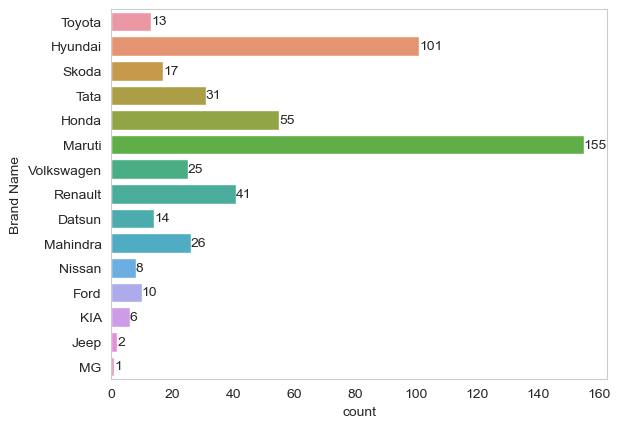

In [50]:

ax=sns.countplot(y="Brand Name",data = cat_data)
sns.set_style("whitegrid")
for  i in ax.containers:
    ax.bar_label(i)

plt.grid(False)
plt.show()


#### - `Observations`:- from the above visualization we can observe that `Maruti` brand cars are more in number and `MG` brand cars are less

In [19]:
cat_data["Model_Name"].value_counts().index.nunique()

78

- From the above info it is saying that there are 78 unique models are present in data lets take top 20 data from the data set.

In [20]:
cat_data["Model_Name"].value_counts().nlargest(20)
cat_data

,Brand Name,Model_Name,Down Payment,Fule Type,RTO Number,Location,Transmission Type
0,Toyota,Etios Liva,Zero,Petrol,DL-10,Noida,Manual
1,Hyundai,Tucson New,Zero,Petrol,HR-26,Noida,Manual
2,Skoda,Rapid,Zero,Petrol,DL-7C,Noida,Manual
3,Hyundai,Verna,Zero,Petrol,HR-26,Delhi,Manual
4,Tata,TIGOR,Zero,Petrol,UP-16,Ghaziabad,Manual
...,...,...,...,...,...,...,...
500,Maruti,Zen Estilo,Zero,Petrol,GJ-06,Vadodara,Manual
501,Maruti,Baleno,Zero,Petrol,GJ-06,Vadodara,Manual
502,Hyundai,Elite i20,Zero,Petrol,GJ-01,Vadodara,Manual
503,Maruti,Alto 800,Zero,Petrol,GJ-06,Hyderabad,Manual


-    `Observation`:- The top 20 car models with high quantities in stock."

In [21]:
cat_data["Model_Name"].value_counts().nsmallest(20)

Fortuner          1
Micra Active      1
Zest              1
HECTOR            1
New Figo          1
Innova            1
Omni              1
S PRESSO          1
BOLERO NEO        1
Micra             1
A Star            1
Go Plus           1
CARENS            1
GRAND I10 NIOS    2
NEW I20           2
Ameo              2
Scorpio           2
WR-V              2
Terrano           2
NEW SANTRO        2
Name: Model_Name, dtype: int64

-    `Observation`: The dataset reveals the presence of 20 car models with the lowest quantity in stock.

In [22]:
# cat_data["Model_Name"]=
model = cat_data['Model_Name'].value_counts(ascending= False)
print(model)
greaterthan10= model[model>10]
def model(cat_data):
    if cat_data in greaterthan10:
        return cat_data
    else :
        return np.nan

Swift         39
Kwid          31
City          23
i10           22
Elite i20     18
              ..
BOLERO NEO     1
Micra          1
A Star         1
Go Plus        1
CARENS         1
Name: Model_Name, Length: 78, dtype: int64


In [23]:
cat_data["greaterthan10"] = cat_data["Model_Name"].apply(model)

- Here we are creating a column as `greaterthan10` by calling a function called model to visualize the data which model cars are having quantity more than 10

In [24]:
cat_data

,Brand Name,Model_Name,Down Payment,Fule Type,RTO Number,Location,Transmission Type,greaterthan10
0,Toyota,Etios Liva,Zero,Petrol,DL-10,Noida,Manual,NaN
1,Hyundai,Tucson New,Zero,Petrol,HR-26,Noida,Manual,NaN
2,Skoda,Rapid,Zero,Petrol,DL-7C,Noida,Manual,Rapid
3,Hyundai,Verna,Zero,Petrol,HR-26,Delhi,Manual,Verna
4,Tata,TIGOR,Zero,Petrol,UP-16,Ghaziabad,Manual,NaN
...,...,...,...,...,...,...,...,...
500,Maruti,Zen Estilo,Zero,Petrol,GJ-06,Vadodara,Manual,NaN
501,Maruti,Baleno,Zero,Petrol,GJ-06,Vadodara,Manual,Baleno
502,Hyundai,Elite i20,Zero,Petrol,GJ-01,Vadodara,Manual,Elite i20
503,Maruti,Alto 800,Zero,Petrol,GJ-06,Hyderabad,Manual,Alto 800


In [25]:
cat_data["greaterthan10"].value_counts()

Swift          39
Kwid           31
City           23
i10            22
Elite i20      18
Polo           18
Wagon R 1.0    18
Rapid          17
Alto 800       16
Swift Dzire    15
Amaze          14
Verna          13
i20            13
Tiago          13
Baleno         13
Name: greaterthan10, dtype: int64

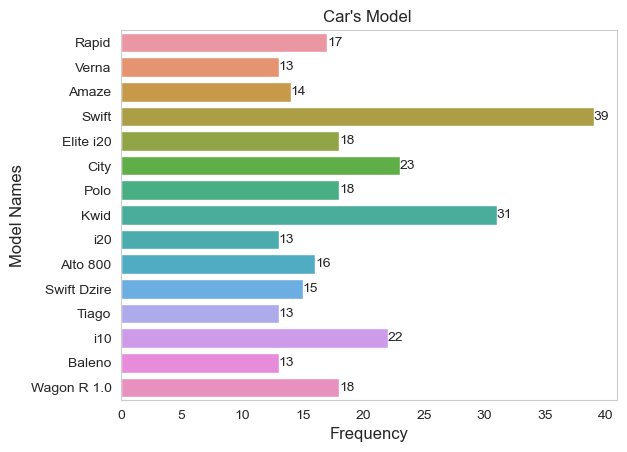

In [52]:
ax=sns.countplot(y="greaterthan10",data=cat_data)
sns.set_style("whitegrid")
plt.grid()
ax.set_xlabel("Frequency", fontsize=12)
ax.set_ylabel("Model Names", fontsize=12)
ax.set_title("Car's Model ", fontsize=12)
for  i in ax.containers:
    ax.bar_label(i)
plt.grid(False)
plt.show()
# plt.ylabel("models which are having more than 10 ")

- `observation`:- from the  above visualization we can say that `Swift` model cars are high in stock among all 78 models

## Model year analysis

In [27]:
num_data["Model_Year"].value_counts()

2017    61
2018    60
2016    53
2019    51
2015    46
2014    42
2020    40
2012    35
2013    29
2010    27
2011    26
2021    24
2022    11
Name: Model_Year, dtype: int64

<Axes: xlabel='count', ylabel='Model_Year'>

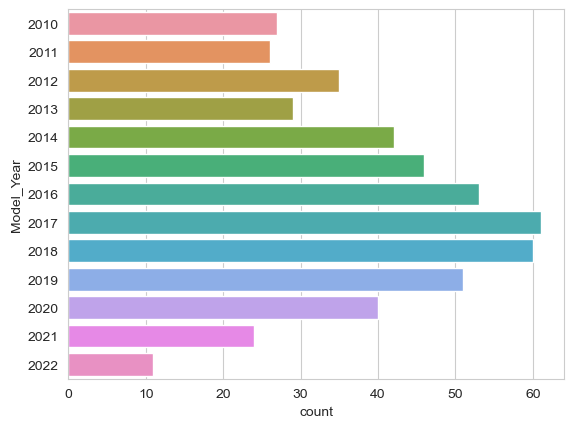

In [28]:
sns.countplot(y="Model_Year",data=num_data)

- `observation`:- in our data set most of the cars are launched in the year between 2015 to 2019 

## Transmission Type Analysis

In [29]:
cat_data["Transmission Type"].value_counts()

Manual       449
Automatic     56
Name: Transmission Type, dtype: int64

<function show at 0x0000026334B6A7A0>


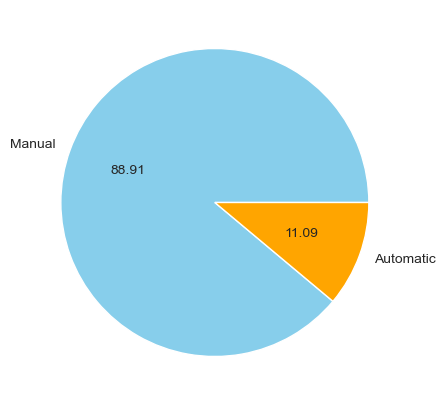

In [30]:
plt.figure(figsize=(5,5)) ## the size of the graph should be in 1st line.
colors = ["skyblue", "orange"]

plt.pie(cat_data["Transmission Type"].value_counts(), labels=cat_data["Transmission Type"].value_counts().index, autopct ="%.2f",colors=colors)
# ax.plt.title.(Transmission Types)
#plt.title("Sample Pie Chart")

print(plt.show)

- from above we can observe that manual type transmission are more 

In [31]:
cat_data["Fule Type"].value_counts()

Petrol    361
Diesel    105
CNG        39
Name: Fule Type, dtype: int64

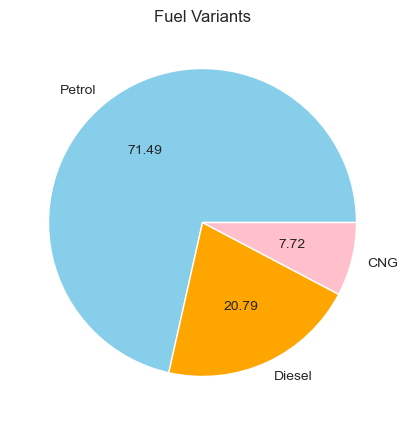

In [57]:
plt.figure(figsize=(5,5)) ## the size of the graph should be in 1st line.
colors = ["skyblue", "orange","pink"]

plt.pie(cat_data["Fule Type"].value_counts(), labels=cat_data["Fule Type"].value_counts().index, autopct ="%.2f",colors=colors)
# ax.plt.title.(Transmission Types)
plt.title("Fuel Variants")
(plt.show())

# Location Analysis

In [33]:
cat_data["Location"].value_counts()

Chandigarh    39
Noida         33
Delhi         24
Hyderabad     22
Mori          20
Surat         20
Rajkot        20
Patna         20
Nagpur        20
Puram         20
Lucknow       20
Mansarovar    20
Kochi         20
Ahmedabad     20
Pune          20
Bengaluru     20
Vadodara      20
Kolkata       19
Chennai       18
Faridabad     17
Gurugram      16
Mulund        15
Rohtak        13
Ludhiana      11
Ghaziabad     10
Mumbai         5
Navalur        2
Chhatarpur     1
Name: Location, dtype: int64

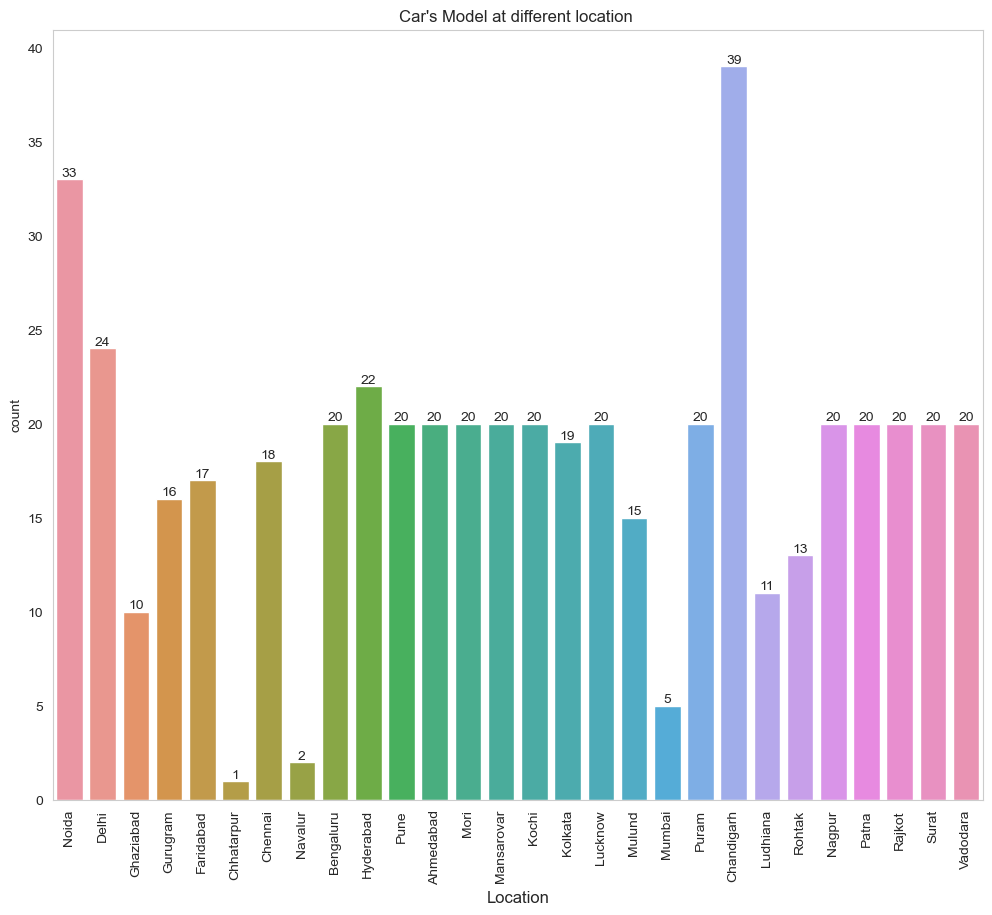

In [54]:
plt.figure(figsize=(12,10))
ax=sns.countplot(x="Location",data=cat_data)
ax.set_xlabel("Location",fontsize=12)
plt.xticks(rotation=90)
plt.xticks(minor=True)
ax.set_title("Car's Model at different location ", fontsize=12)
for  i in ax.containers:
    ax.bar_label(i)
plt.grid(False)
plt.show()
#plt.xticks(rotation=45)

- `observation`:- from chandigarh we are having more cars comparing to all other cities. 
-  `petrol` variants are more in Noida.
-  `CNG` variants are more in Vadodara,chandigarh,Faridabad,Ahmedabad
-  `Diesel` variants are more in chandigarh.

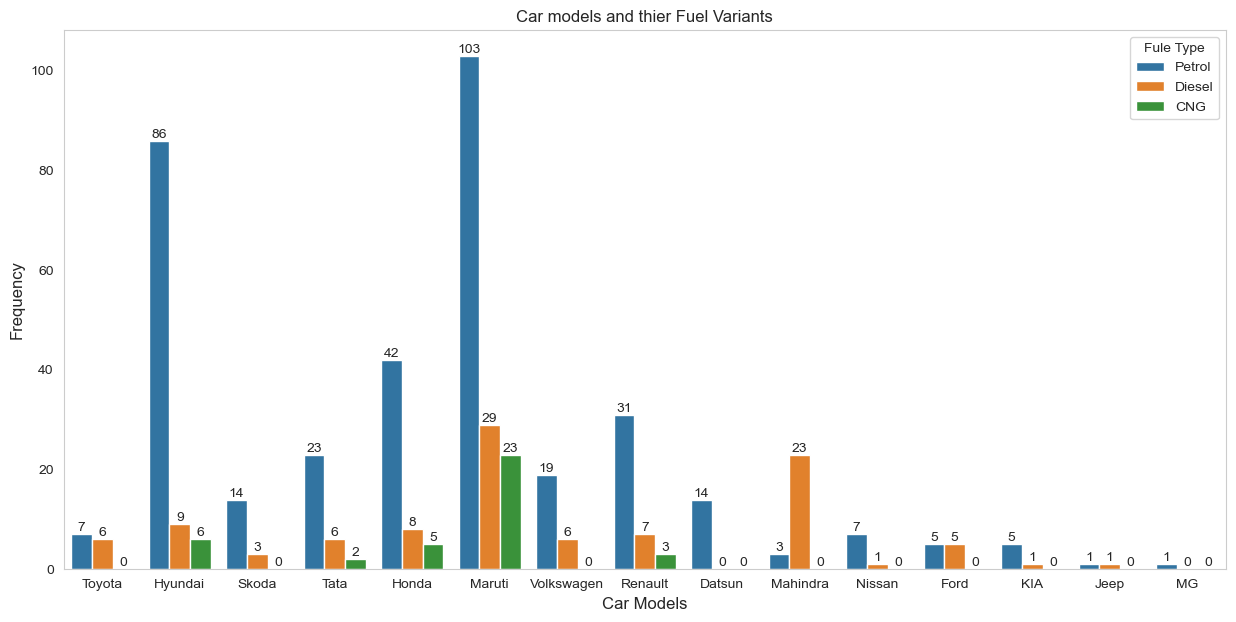

In [58]:

plt.figure(figsize=(15,7))
ax=sns.countplot(cat_data, x="Brand Name" ,hue="Fule Type")
ax.set_xlabel("Car Models",fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
#ax.set_ylabel("Model Names", fontsize=12)
ax.set_title("Car models and thier Fuel Variants", fontsize=12)
for  i in ax.containers:
    ax.bar_label(i)
plt.grid(False)
plt.show()


- `observation`:- Maruti brand cars are having high in quantity in all the three variants 

In [36]:
Avg_selling_price=cars_data.groupby(["Transmission Type","Fule Type"],as_index=False)["Actual Price"].mean().sort_values("Actual Price",ascending=False)

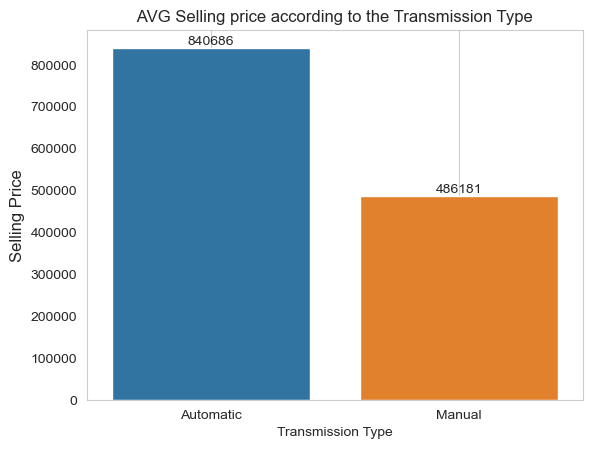

In [37]:
ax=sns.barplot(x='Transmission Type', y='Actual Price',data=Avg_selling_price,errorbar=None)
for i in ax.containers:
    ax.bar_label(i)
sns.set_style("whitegrid")
ax.set_xlabel("Transmission Type")
# ax.set_xlabel("Frequency", fontsize=12)
ax.set_ylabel("Selling Price", fontsize=12)
ax.set_title(" AVG Selling price according to the Transmission Type ", fontsize=12)
plt.grid(visible=None)
plt.show()

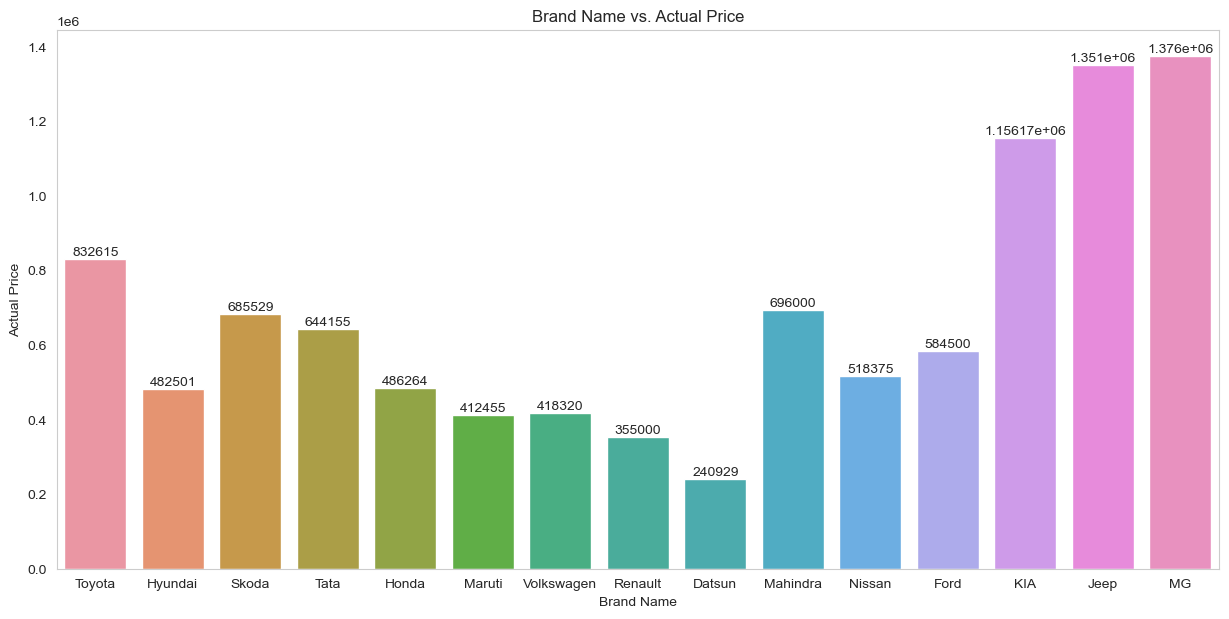

In [59]:
plt.figure(figsize=(15,7))

ax=sns.barplot(x='Brand Name', y='Actual Price', data=cars_data,errorbar=None)

# ax=set_xticks(ax.get_xticklabels(), rotation=90)
for i in ax.containers:
    ax.bar_label(i)

plt.title("Brand Name vs. Actual Price")
plt.xlabel("Brand Name")
plt.ylabel("Actual Price")
plt.grid(False)
plt.show()

In [39]:
price_avg=cars_data.groupby(["Fule Type"],as_index=False)["Actual Price"].mean().sort_values("Actual Price",ascending=False)

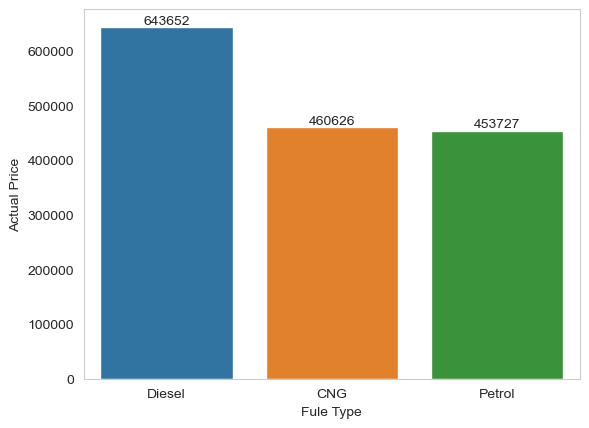

In [60]:
ax=sns.barplot(x="Fule Type",y="Actual Price",data=price_avg,errorbar =None)
for i in ax.containers:
    ax.bar_label(i)
plt.grid(False)

In [41]:
cars_data["Emi Per Month"].describe()

count      505.000000
mean      9588.463366
std       5419.375992
min       2620.000000
25%       5728.000000
50%       8367.000000
75%      11847.000000
max      42541.000000
Name: Emi Per Month, dtype: float64

In [42]:
def outlier_detection(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)

    IQR = q3-q1

    # Lower Boundary
    lb = q1-(1.5*IQR)

    # upper Boundary
    ub = q3+(1.5*IQR)

    return len((cars_data.loc[(col < lb) |(col>ub)]))

In [43]:
outliers=outlier_detection(cars_data["Emi Per Month"])

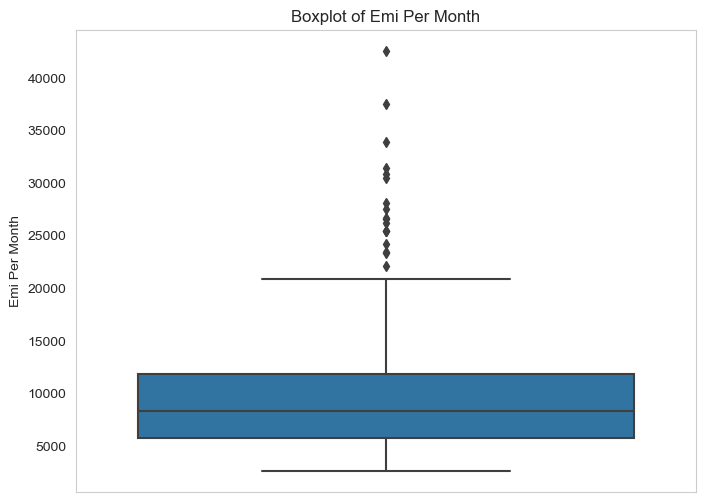

In [61]:


plt.figure(figsize=(8, 6))
sns.boxplot(data=cars_data, y="Emi Per Month")

plt.title("Boxplot of Emi Per Month")
plt.ylabel("Emi Per Month")
plt.grid(False)
plt.show()



In [45]:
#cars_data.rename(columns={"Actual Price":"Selling_Price"},inplace = True)

<Axes: >

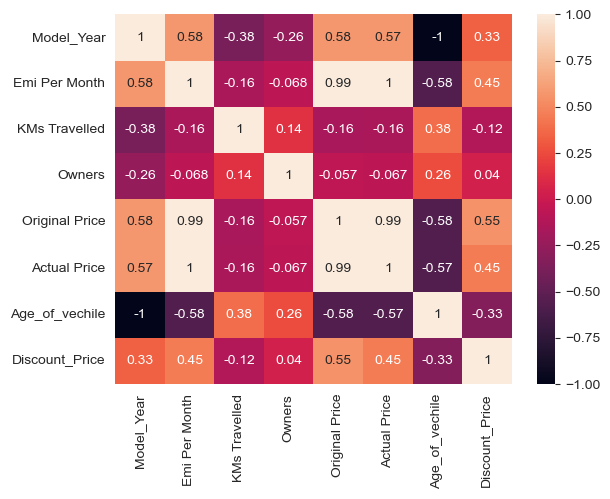

In [46]:
sns.heatmap(cars_data.corr(),annot=True)


- from above graph we can observe that emi price and selling price are highly positve corelated
- and kms travelled and selling price are negatively corelated as kms travelled increases the selling price decreases.
- as age of vechile Increases the actual price decreases 

 ## model and Price

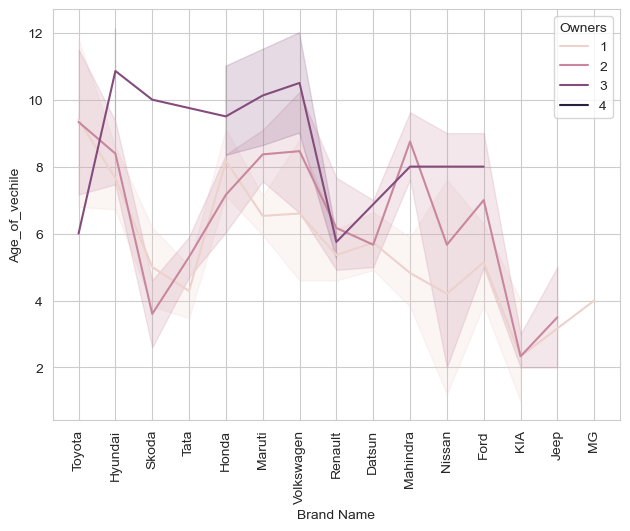

In [47]:
sns.lineplot(x='Brand Name', y= 'Age_of_vechile', hue="Owners",data= cars_data)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

### How Age of Vechile is effecting the Price of Vechile

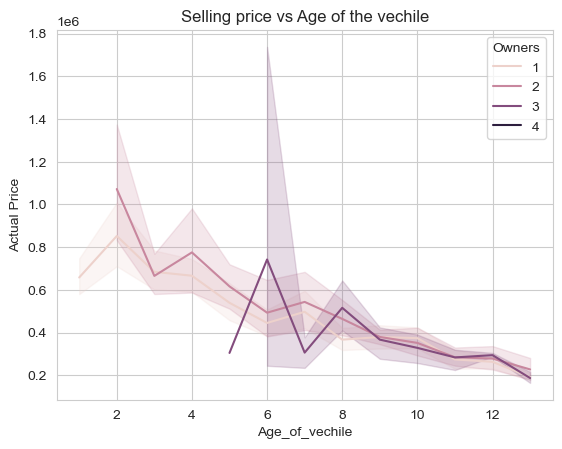

In [48]:
ax=sns.lineplot(data=cars_data, x="Age_of_vechile", y="Actual Price",hue="Owners")
for i in ax.containers:
    ax.line_label(i)
ax.set_title("Selling price vs Age of the vechile")
plt.show()

- `Observation` :- As the age of vechile increases the the selling price of car is decreasing.

## How Selling Price effecting by  Age of the vechile , KMs Travelled , Owners

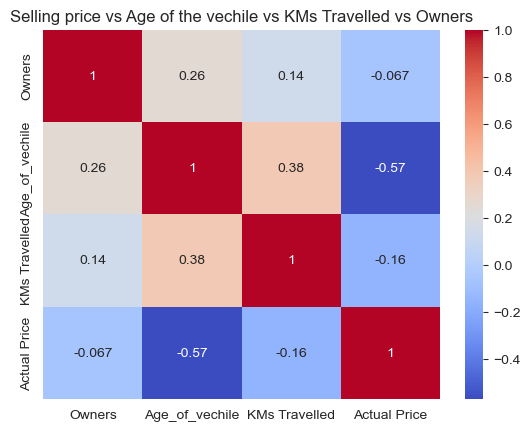

In [49]:
correlation_matrix = cars_data[[ "Owners","Age_of_vechile","KMs Travelled","Actual Price"]].corr()

ax=sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
ax.set_title("Selling price vs Age of the vechile vs KMs Travelled vs Owners" )
plt.show()

- `Observation`:- from the above correlation wecan observe how Actual Selling price is effecting by other factors 
- when number of `owners` ,`age of vechile` ,`Distance` travelled by car increases  the Actual price of car decreases.
- Which is negatively corelated.